In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
apps_details = pd.read_csv('/content/drive/MyDrive/Organización de Datos/TP1 - Visualizaciones/googleplaystore.csv')

In [4]:
apps_details

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.90,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.50,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.00,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.50,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [5]:
#no considero apps duplicadas ni con ratings inválidos
apps_details_rated = apps_details.drop_duplicates(subset='App')
apps_details_rated = apps_details_rated[(apps_details_rated.Rating <= 5)]


La decisión de eliminar apps duplicadas, como en el histograma, se debe a que las considero un error en el archivo y opté por eliminarlas. Si no hacía esto, debía unificar de alguna manera las apps repetidas y sumar la cantidad de reviews, lo que haría que haya más en algunas aplicaciones. Opté este camino ya que es el mismo que había tomado anteriormente, no considero que el otro sea inválido ni peor, habrá una mayor cantidad de reviews en cada categoría.

In [6]:
apps_details_rated.loc[:, "Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [7]:
apps_details_rated = apps_details_rated[(apps_details_rated.loc[:, 'Content Rating'] != 'Unrated')]

Noto que hay una categoría de content rating que se llama 'Unrated', por lo que no la tendré en cuenta ya que haré un heatmap según la restricción por edad que tiene cada aplicación, y esta no me servirá.

In [8]:
apps_details_rated["Reviews"] = apps_details_rated["Reviews"].astype(int)
apps_details_rated

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.90,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.00,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.50,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.00,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.50,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [9]:
table = pd.pivot_table(apps_details_rated,values='Reviews',index=['Content Rating','Type'],aggfunc='sum',fill_value=0)

In [12]:
table

Reviews
Content Rating  Type            
Adults only 18+ Free       81348
Everyone        Free  1297812561
                Paid     2490156
Everyone 10+    Free   198559034
                Paid     2768812
Mature 17+      Free    86256248
                Paid      781209
Teen            Free   502735309
                Paid      555191

In [10]:
reviews_by_content_rating_and_type = table.reset_index().pivot(index='Content Rating', columns='Type', values='Reviews').fillna(0)
reviews_by_content_rating_and_type = reviews_by_content_rating_and_type.astype(int)

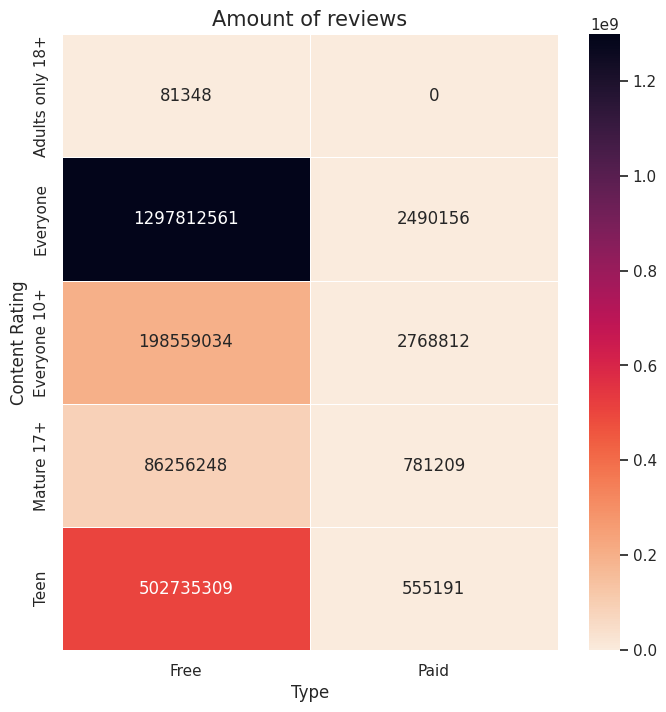

In [11]:
sns.set(rc={"figure.figsize":(8, 8)})

heatmap = sns.heatmap(reviews_by_content_rating_and_type,cmap='rocket_r',annot=True, linewidth=0.5, linecolor='white', fmt = 'd')
heatmap.set_ylabel('Content Rating', fontsize=12)
heatmap.set_xlabel('Type', fontsize=12)
heatmap.set_title('Amount of reviews', fontsize=15)

plt.show()